Generation of waves from an arbitrary time series - `TimeSeries` Class
====================================================

The TimeSeries class can be used to read and reconstruct any time series of the free-surface elevation given as a time-column format and stored in `.txt` or `.csv` file. Then it uses FFT to process the signal and generate the spectral distribution of the series. Waves are generated using a similar tecnhique as in the RandomWaves class

The signal can be processed using two different techniques:
- Direct processing, where the time series is processed as a whole using FFT
- Processing with spectral windows, where the time series is segmented and each window is processed separately

A sketch describing the processing between windows is shown below. A tapered filter is used for rendering the signal in windows periodic and windows are overlapped to avoid energy loss. 




<img src = "Window.PNG" width="75%" height = 75%>

Loading definitions

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import sys
#Append path of local proteus installation
sys.path.append("C:/Users/present/Desktop/proteus/")
#The notebook will work with the following commit:
#https://github.com/erdc-cm/proteus/commit/9bb34b3563b5ddab6cb1dd9f75173da2710d2a41
from proteus import Profiling,SpatialTools
#import imp
#WT = imp.load_source('WaveTools', 'WaveTools.pyx')
import time as tmclock
from proteus import WaveTools as WT

Examples of loading classes

In [2]:
#Setting up wave properties
timeSeriesFile="test_timeSeries.txt"
skiprows=0
depth=7.
N=48
mwl=0.
waveDir=np.array([1., 0., 0.])
g=np.array([0., 0., -9.81])
window_params=None
timeSeriesPosition=np.array([0., 0., 0.])


#Calling the class
TS = WT.TimeSeries(timeSeriesFile, # e.g.= "Timeseries.txt",
                 skiprows,
                 timeSeriesPosition,
                 depth  ,
                 N ,          #number of frequency bins
                 mwl ,        #mean water level
                 waveDir, 
                 g,
                 cutoffTotal = 0.02,
                 rec_direct = True,
                 window_params = None 
                )
#Loading reconstruction in windows
TSW = WT.TimeSeries(timeSeriesFile, # e.g.= "Timeseries.txt",
                 skiprows,
                 timeSeriesPosition,
                 depth  ,
                 N ,          #number of frequency bins
                 mwl ,        #mean water level
                 waveDir, 
                 g,
                 cutoffTotal = 0.02,
                 rec_direct = False,
                 window_params ={"Nwaves":3,"Tm":8.,"Window":"costap"} 
                )


In the following example, we will reconstruct a timeseries using a file by both using direct and window processing. We use the same number of frequencies and we will show the fidelity and the time needed for the computation

In [3]:
#Importing the time series file
with open("test_timeSeries.txt","r") as f:
    timeSeries=np.loadtxt(f)
    
time = timeSeries[:,0]
eta = timeSeries[:,1]
eta -= np.mean(eta)

#Setting up a time interval of n periods (using npoints sampling points per period)

n = len(time)
tnlist=np.linspace(0,time[-1],n)
eta_t = np.zeros(len(tnlist),)
eta_tw = eta_t.copy()


x = timeSeriesPosition
#Calculating time series
t1 =-tmclock.clock()
for i in range(len(tnlist)):
    t = tnlist[i]
    eta_t[i] = TS.eta(x, t)
t1 = t1 +  tmclock.clock()

#Calculating time series
t2 = -tmclock.clock()
for i in range(len(tnlist)):
    t = tnlist[i]
    eta_tw[i] = TSW.eta(x, t)
t2 = t2 +  tmclock.clock()

/home/jovyan/proteus/linux/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jovyan/proteus/linux/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jovyan/proteus/linux/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jovyan/proteus/linux/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Plotting the timeseries

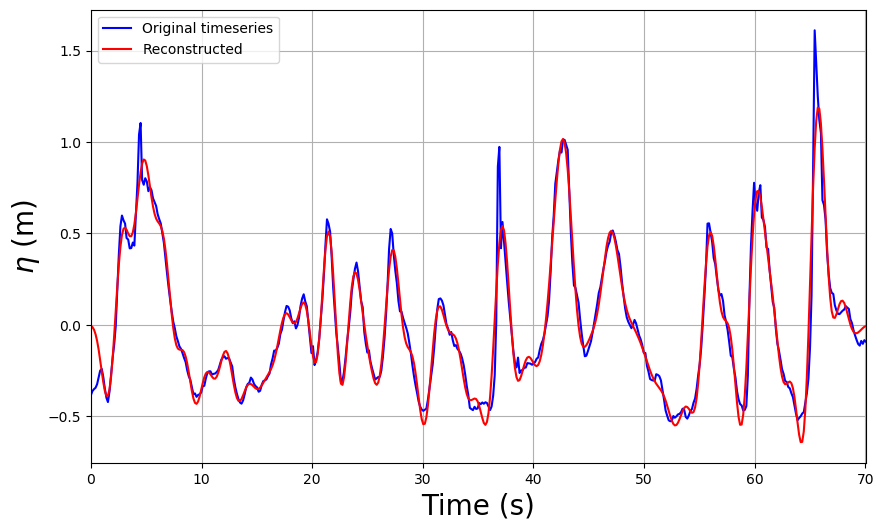

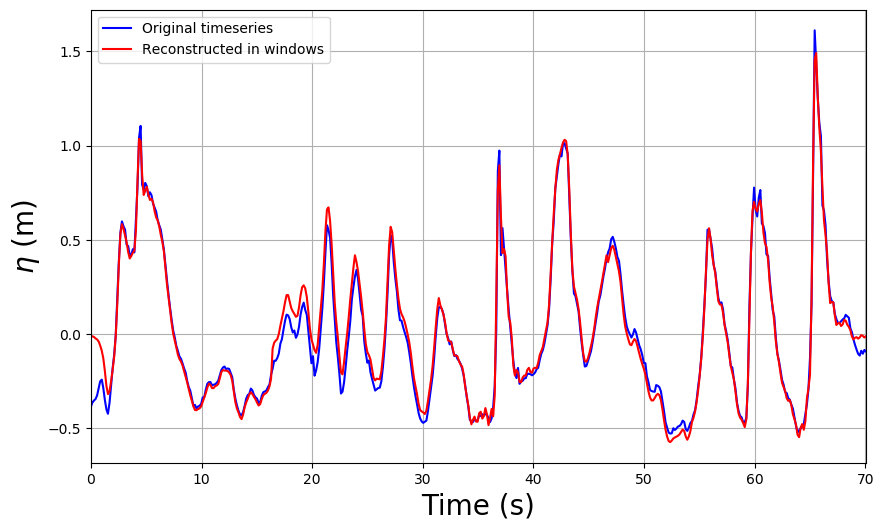

Time for direct reconstruction: 0.0015620000000002854
Time for reconstruction in windows: 0.001827000000000023


In [4]:
psize=20
#Plotting both time series from time series file and wave class
plt.figure(1, figsize=(10,6), dpi=100)
plt.plot(time, eta, color='blue', label="Original timeseries")
plt.plot(tnlist, eta_t, color='red', label="Reconstructed")
plt.xlim(0, time[-1])
plt.xlabel("Time (s)", size=psize)
plt.ylabel("$\eta$ (m)", size=psize)
plt.legend(loc='upper left')
plt.grid()
plt.show()




#Plotting both time series from time series file and wave class
plt.figure(1, figsize=(10,6), dpi=100)
plt.plot(time, eta, color='blue', label="Original timeseries")
plt.plot(tnlist, eta_tw, color='red', label="Reconstructed in windows")
plt.xlim(0, time[-1])
plt.xlabel("Time (s)", size=psize)
plt.ylabel("$\eta$ (m)", size=psize)
plt.legend(loc='upper left')
plt.grid()
plt.show()

print ("Time for direct reconstruction:",t1)
print ("Time for reconstruction in windows:",t2)